# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
df_close = yf.Tickers(ticker_list).history(start=start_date, end=end_date, period=None)['Close']

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


In [8]:
# df_close has a row for each date and a column for each stock ticker.
# It is indexed by the date, and the value for each cell is the closing price of the stock on that date.
display(df_close)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714767,156.160004,103.735458,91.096085,293.442108,469.390015,189.859924,55.668903,...,29.172792,91.453217,51.484386,111.217087,129.094391,66.839996,132.078369,118.202538,309.049988,156.223297
2024-05-02,136.217377,171.991272,153.844177,158.330002,103.374344,90.497009,295.092773,476.570007,192.405899,56.603550,...,29.955240,93.958229,51.493961,111.418373,134.052750,70.300003,131.824631,117.115044,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695084,159.710007,103.354828,89.774330,298.403900,486.179993,195.480637,56.431889,...,30.032518,95.378395,51.934326,111.188332,135.255371,69.470001,131.112137,120.278709,309.589996,164.670197
2024-05-06,139.278091,180.619186,155.681015,162.000000,103.101074,92.370285,300.712799,493.589996,199.093933,57.404682,...,30.022860,96.522446,52.039631,111.907219,137.217010,73.529999,132.907913,119.191200,315.790009,163.566269
2024-05-07,139.931839,181.305023,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338745,58.739899,...,29.800682,95.891251,52.671455,111.351280,138.035202,71.599998,132.644424,120.051323,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [9]:
# We start by defining a function to compute the moving averages for a single stock.
def compute_moving_averages(values: np.ndarray, window: int) -> np.ndarray:
    """
    Compute the moving averages of a given array of values with the specified window size.
    """
    result = np.full_like(values, np.nan)
    for i in range(window, len(values)):
        result[i] = np.mean(values[i-window:i])

    return result

In [10]:
# We now compute the moving averages for all stocks
mv_avgs_50 = {}

for ticker in ticker_list:
    stock = df_close[ticker]
    mv_avg_50 = compute_moving_averages(stock.values, 50)
    mv_avgs_50[ticker] = mv_avg_50

In [11]:
# And convert it to a DataFrame, indexed by the date

df_ma50 = pd.DataFrame(mv_avgs_50, index=df_close.index)

# We skip the first 50 rows because they will be NaN, since there is not enough data to compute the moving average for those dates.
display(df_ma50.iloc[51:55])

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-16,98.363777,82.086963,101.650911,158.097097,294.541233,502.910001,162.9840,18.518137,86.218277,136.155670,...,39.552557,253.314330,229.0936,90.837969,52.200766,137.285972,132.570661,312.963799,111.715038,169.825459
2024-07-17,98.504224,82.252491,101.599087,158.287368,295.053824,504.709400,163.6118,18.493878,86.414031,136.131748,...,39.634546,253.564844,228.7892,90.658511,52.213966,137.397157,132.462982,313.424800,111.502259,170.134555
2024-07-18,98.664116,82.366966,101.586113,158.537830,295.512035,506.247601,163.7884,18.460143,86.635952,136.018784,...,39.719842,253.887485,228.3062,90.430282,52.245242,137.439617,132.377595,313.750800,111.297349,170.429851
2024-07-19,98.822757,82.442956,101.487753,158.728824,295.973409,507.512800,163.7882,18.426029,86.832763,135.852473,...,39.809851,254.172436,227.9196,90.150694,52.283310,137.423868,132.236285,313.902400,111.120926,170.700040


In [12]:
# Repeat the whole process for the 200-day moving average

mv_avgs_200 = {}
for ticker in ticker_list:
    stock = df_close[ticker]
    mv_avg_200 = compute_moving_averages(stock.values, 200)
    mv_avgs_200[ticker] = mv_avg_200

df_ma200 = pd.DataFrame(mv_avgs_200, index=df_close.index)

display(df_ma200.iloc[201:205])

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-20,122.483989,77.304112,110.688045,174.797849,335.607812,501.340149,145.49560,15.547572,100.052464,137.657148,...,47.199349,287.180102,244.634001,87.270658,60.303034,129.709251,132.516874,355.13015,108.188568,175.276147
2025-02-21,122.754793,77.226230,110.830991,175.015309,336.047053,501.230749,145.33565,15.510292,100.161624,137.657127,...,47.302930,287.550672,244.687901,87.265738,60.386451,129.685572,132.605334,355.17150,108.118698,175.233846
2025-02-24,123.003543,77.140589,110.982706,175.224408,336.367347,501.021449,145.13685,15.473851,100.264285,137.640477,...,47.400929,287.929771,244.690951,87.240239,60.470715,129.643968,132.689893,355.17880,108.038981,175.207432
2025-02-25,123.257504,77.052067,111.135838,175.448401,336.674355,500.775599,144.89850,15.437054,100.369139,137.617635,...,47.496529,288.314735,244.750451,87.207224,60.558583,129.596992,132.772837,355.14760,107.970424,175.210626


### Detecting Golden and Death Crosses in the last 14 days

In [13]:
def has_golden_cross(_ma50: np.ndarray, _ma200: np.ndarray) -> bool:
    # This is a boolean array with True where the 50-day moving average is greater than the 200-day moving average for a given day.
    ma50_gt_ma200 = _ma50 >= _ma200

    # We now check if there was a transition from False to True
    for i in range(1, len(ma50_gt_ma200)):
        prev = ma50_gt_ma200[i-1]
        current = ma50_gt_ma200[i]
        if not prev and current:
            return True

    return False

In [14]:
# Use the previously defined function to check for Golden Crosses in the last 14 days
stocks_with_golden_cross = []

for ticker in ticker_list:
    ma50 = df_ma50[ticker].values[-14:]
    ma200 = df_ma200[ticker].values[-14:]

    if has_golden_cross(ma50, ma200):
        stocks_with_golden_cross.append(ticker)

print(f'Found {len(stocks_with_golden_cross)} stocks with Golden Crosses in the last 14 days.')
print('First 10 stocks with Golden Crosses:', sorted(stocks_with_golden_cross)[:10])

Found 8 stocks with Golden Crosses in the last 14 days.
First 10 stocks with Golden Crosses: ['AMT', 'EW', 'KDP', 'MDLZ', 'MOH', 'NEM', 'SBAC', 'SJM']


In [15]:
# Create a function to check for Death Crosses, using the same approach as before

def has_death_cross(_ma50: np.ndarray, _ma200: np.ndarray) -> bool:
    # This is a boolean array with True where the 50-day moving average is greater than the 200-day moving average for a given day.
    ma50_gt_ma200 = _ma50 >= _ma200

    # We now check if there was a transition from True to False in the last `period` days.
    for i in range(1, len(ma50_gt_ma200)):
        prev = ma50_gt_ma200[i-1]
        current = ma50_gt_ma200[i]
        if prev and not current:
            return True

    return False

In [16]:
stocks_with_death_cross = []

for ticker in ticker_list:
    ma50 = df_ma50[ticker].values[-14:]
    ma200 = df_ma200[ticker].values[-14:]

    if has_death_cross(ma50, ma200):
        stocks_with_death_cross.append(ticker)

print(f'Found {len(stocks_with_death_cross)} stocks with Death Crosses in the last 14 days.')
print('First 10 stocks with Death Crosses:', sorted(stocks_with_death_cross)[:10])

Found 58 stocks with Death Crosses in the last 14 days.
First 10 stocks with Death Crosses: ['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP', 'BAC', 'BLK']


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

- AMT
- EW
- KDP
- MDLZ
- MOH
- NEM
- SBAC
- SJM

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

- ACN
- ADSK
- AME
- AMP
- AMZN
- APD
- APO
- AXP
- BAC
- BLK

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [37]:
import math

# Volatility is obtained by the std. dev. of daily returns (in percentage),
# multiplied by the sqrt. of the amount of trading days for the given period.
# https://www.fool.com/investing/how-to-invest/stocks/how-to-calculate-stock-volatility/
def compute_volatility(closing_prices) -> float:
    return closing_prices.pct_change(fill_method=None).std() * math.sqrt(len(closing_prices))



In [38]:
volatility_by_stock = {}

for ticker in ticker_list:
    volatility = compute_volatility(df_close[ticker])
    volatility_by_stock[ticker] = volatility

df_volatility = pd.DataFrame.from_dict(volatility_by_stock, orient='index', columns=['Volatility'])

volatility_sorted = sorted(volatility_by_stock.items(), key=lambda x: x[1])

print("Top 10 least volatile stocks:")
for stock, volatility in volatility_sorted[:10]:
    print(f"{stock}: {volatility:.2%}")

print("\nTop 10 most volatile stocks:")
for stock, volatility in volatility_sorted[-10:]:
    print(f"{stock}: {volatility:.2%}")

Top 10 least volatile stocks:
EVRG: 15.63%
ATO: 16.74%
WEC: 17.20%
MMC: 17.40%
PPL: 17.42%
DUK: 17.45%
RSG: 17.59%
PNW: 17.75%
SO: 18.32%
JNJ: 18.46%

Top 10 most volatile stocks:
MU: 63.29%
ENPH: 64.18%
MPWR: 66.00%
CEG: 69.03%
MRNA: 69.18%
TSLA: 71.92%
PLTR: 72.16%
VST: 75.17%
COIN: 83.43%
SMCI: 112.86%


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

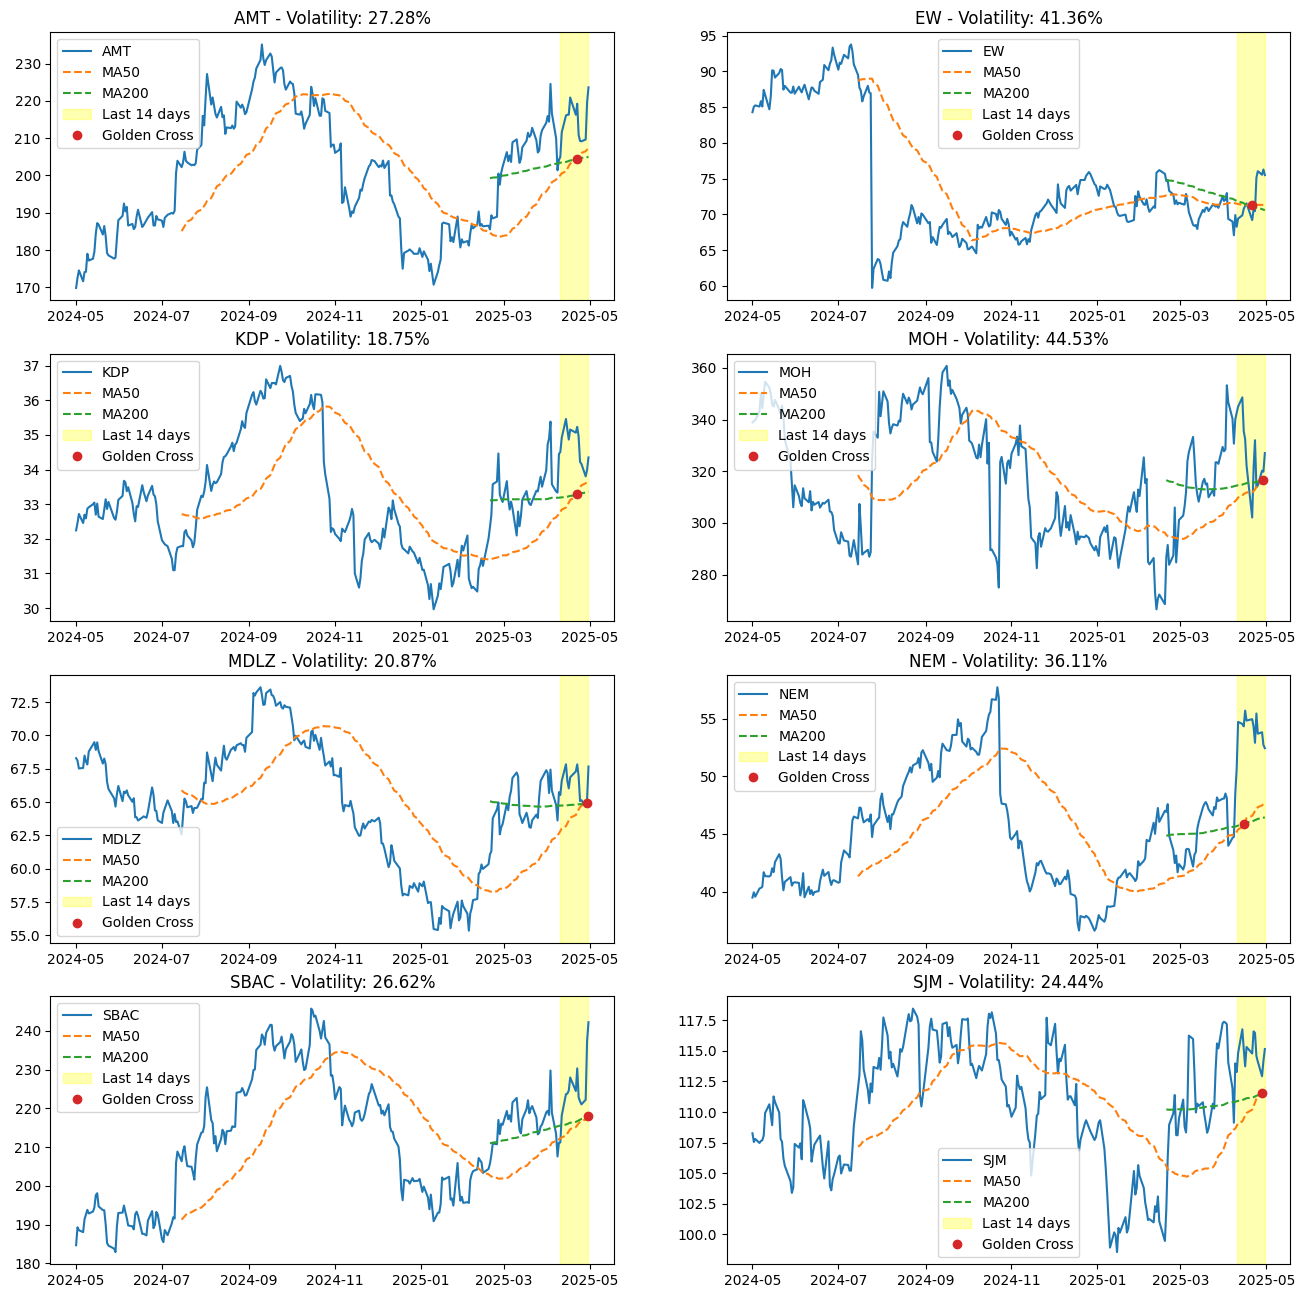

In [66]:
fig, axs= plt.subplots(min(10, len(stocks_with_golden_cross))//2, 2, figsize=(16, 2 * min(10, len(stocks_with_golden_cross))))

for stock, ax in zip(stocks_with_golden_cross, axs.ravel()):
    ax.set_title(f'{stock} - Volatility: {volatility_by_stock[stock]:.2%}')
    ax.plot(df_close.index, df_close[stock], label=stock)
    ax.plot(df_ma50.index, df_ma50[stock], label='MA50', linestyle='--')
    ax.plot(df_ma200.index, df_ma200[stock], label='MA200', linestyle='--')
    ax.axvspan(df_ma50.index[-14], df_ma50.index[-1], color='yellow', alpha=0.3, label='Last 14 days')

    df_golden_cross_l14d = (df_ma50 > df_ma200).loc[df_ma50.index[-14]:df_ma50.index[-1]]
    golden_cross_date = df_golden_cross_l14d[stock][df_golden_cross_l14d[stock] == True].index[0]
    ax.plot(golden_cross_date, df_ma50[stock].loc[golden_cross_date], 'o', label='Golden Cross')

    ax.legend()


### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

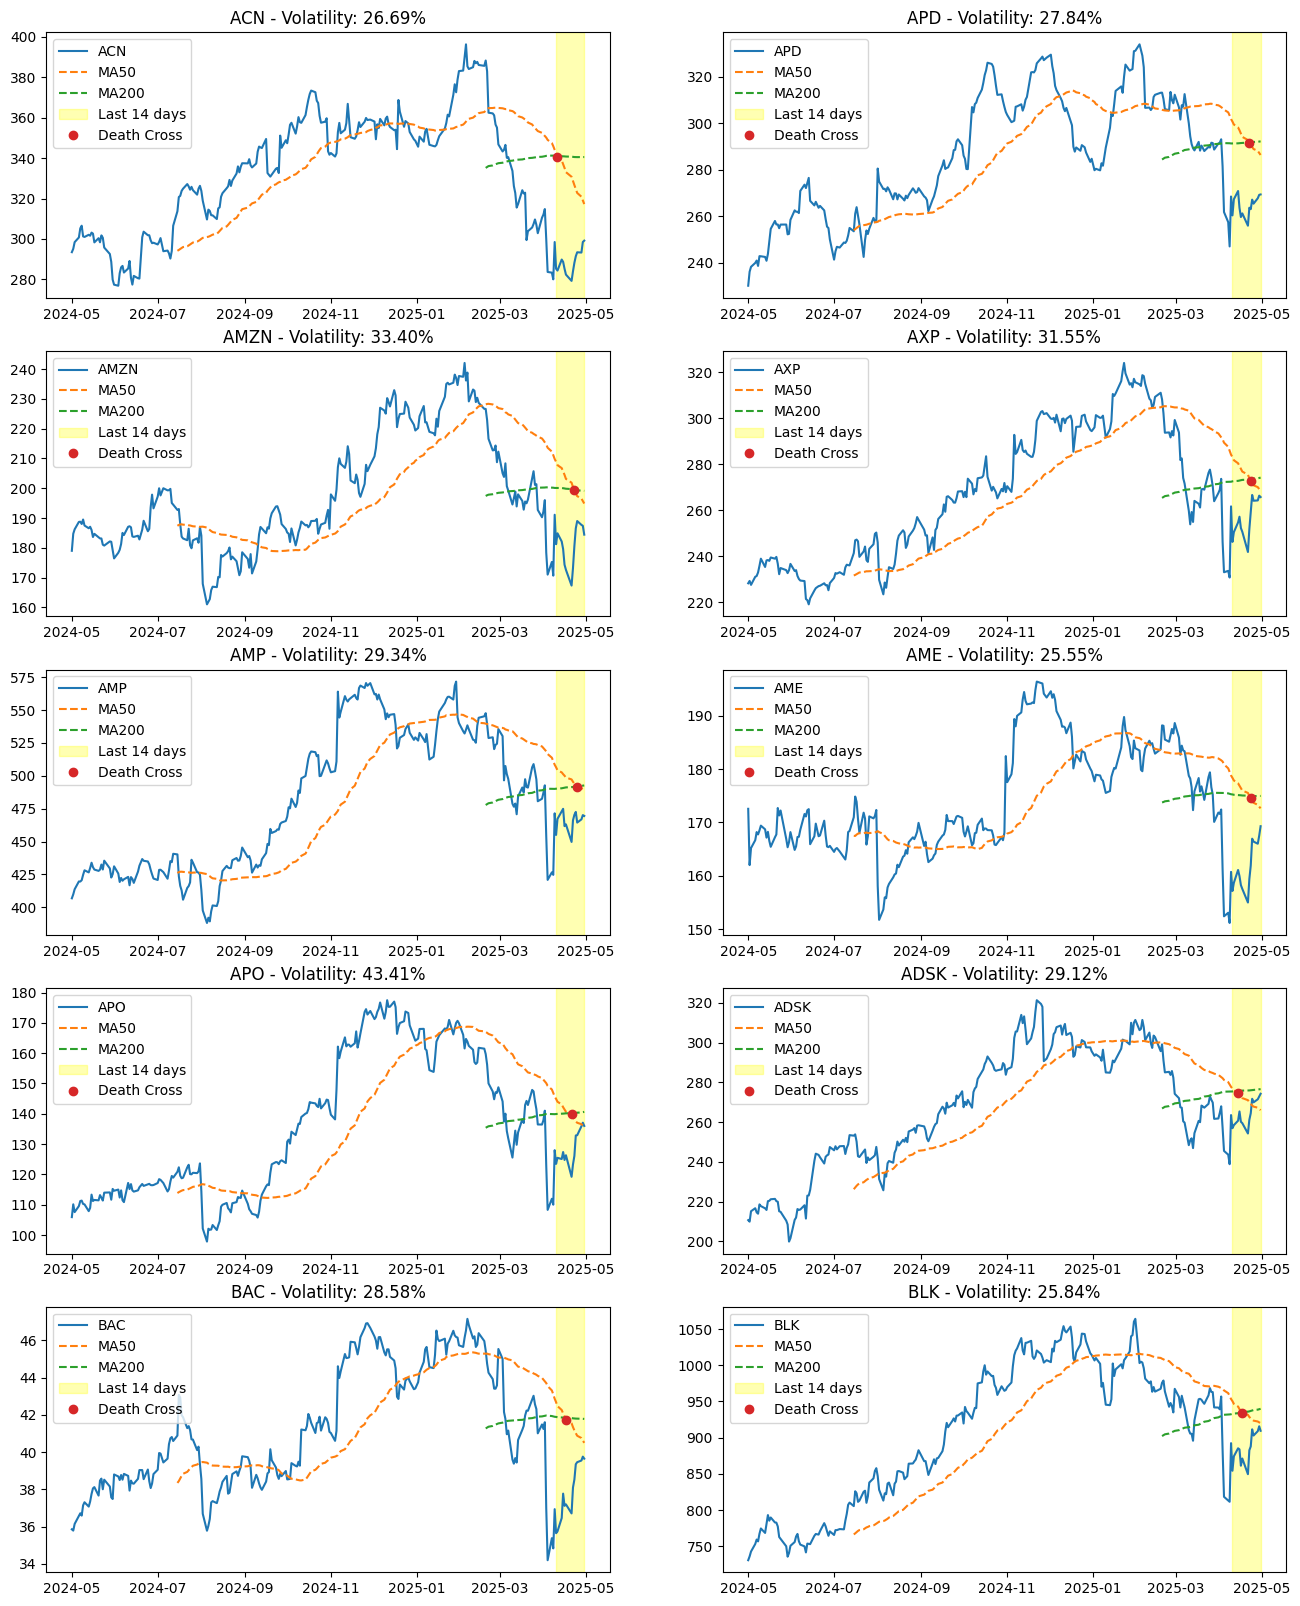

In [67]:
fig, axs= plt.subplots(min(len(stocks_with_death_cross),10)//2, 2, figsize=(16, 2 * min(10,len(stocks_with_death_cross))))

for stock, ax in zip(stocks_with_death_cross[:10], axs.ravel()):
    ax.set_title(f'{stock} - Volatility: {volatility_by_stock[stock]:.2%}')
    ax.plot(df_close.index, df_close[stock], label=stock)
    ax.plot(df_ma50.index, df_ma50[stock], label='MA50', linestyle='--')
    ax.plot(df_ma200.index, df_ma200[stock], label='MA200', linestyle='--')
    ax.axvspan(df_ma50.index[-14], df_ma50.index[-1], color='yellow', alpha=0.3, label='Last 14 days')

    df_death_cross_l14d = (df_ma50 > df_ma200).loc[df_ma50.index[-14]:df_ma50.index[-1]]
    death_cross_date = df_death_cross_l14d[stock][df_death_cross_l14d[stock] == False].index[0]
    ax.plot(death_cross_date, df_ma50[stock].loc[death_cross_date], 'o', label='Death Cross')
    ax.legend()


## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross occurs when the short term moving average transitions from being below the long term moving average to being above it. This can indicate to investors that the stock is about to start an upward trend, to which they may want to start buying the stock to maximize gains.


#### What is a Death Cross and how might market participants react to it?

Opposite to the Golden Cross, the Death Cross occurs when the short them MA transitions from being above to being below the long term MA, indicating a downward trend for the stock. This might be a good time for investors to sell their stock before it loses more value.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Because moving averages can capture trends in the stock price by taking into account historical data. Also, by comparing moving averages for different periods (like 50 vs 200 days), it's possible to contextualize the stock behavior across time.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

14 days provide enough data points to check for the crosses; and by choosing to analyze the last 14 days, any signal identified will be recent enough so investors can immediatelly act upon them.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

The volatility may indicate how soon the new trend may "materialize". For example, a golden cross with low volatility can indicate an upward trend in the long term; meaning that an investor could invest in a relatively low risk stock, but it might take a long time to get significant profits.

Meanwhile, a golden cross with high volatility indicates that even if an upward trend is starting, it may not last long because the price of the stock fluctuates a lot. This may represent a higher risk investment with short term gains.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

I would record the stock price at the moment when the golden-cross was identified. Then, I compare that price with the price whenever a sell signal is identified; for example, a death-cross occurring after the golden-cross that resulted in a buy-decision.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Technical indicators only care about the stock price trends without accounting for external factors. While one of the main assumptions is that the market behavior is cyclical, technical indicators cannot account for unexpected and extraordinary circumstances that may affect the market. For example, global events like the COVID-19 pandemic, armed conflicts, and (more recently) new import tariffs can affect the market in unexpected and sudden ways that technical indicators cannot predict.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

I would take into account not only the fact that a cross occured, but also how much difference is there between the short and long term MAs; a large difference between them may indicate a more clear signal.

Another option is to consider the rate of change for the MAs; steeper changes can have more weight than small changes.

Lastly, using weigher averages (like exponential MA) can improve the signal, since they emphasize recent data points and can identify crosses faster.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, because they can provide the context to better understand market factors impacting the price of the stock. For example, if a golden cross is identified and news are positive, this will most likely represent the start of a bull-ish market. On the other hand, if the news are negative, this might indicate that the golden cross is a false negative.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

Yes, I consider the identification of golden crosses or death crosses to be an actionable signal. While they are not perfect and may not fully maximize profits, they are a good way to at least consider a buy or sell decision, respectively.

Because of this, for non-experts traders can make use of this strategy to obtain gains from the stock market.

On the other hand, expert and institutional traders may require more complex methods to fully maximize gains.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

At least for the instances identified in this exercise, yes, golden crosses indeed predict upward movement.

However, it is worth noting that they are somewhat conservative, because the golden-cross occured a few days after the upward trend started, based on cualitative analysis of the plots.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

- Golden-cross and low volatility can result in mid-to-long term gains
- Death-crosses can represent a good moment to sell stock if the market value is higher than the price at which the stock was acquired.


Caveats in 2 or 3 bullet points:

- Golden-crosses identify an upward trend, but they don't signal the lowest purchase price, limiting potential gains
- Consider using exponential moving averages so that recent changes have more weight